# Homework #6

## Performance measures

This colaboratory also contains **Homework #6** of the Machine Learning course, which is due **December 04, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.


## Submission's rules:

1.   Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:

Pooh

##List of Homework's exercises:

1.   [Ex1](#scrollTo=Va-cdXRPJ0qZ) - 5 points
2.   [Ex2](#scrollTo=lbbE3lltHbA_) - 5 points


In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro (actually, no)
!pip install -q plotnine
from plotnine import *



---

## Homework exercise 1: compute macro and weighted averages for precision, recall and f1-score on an unbalanced dataset (5 points)


<font color='red'> In this exercise we will start with training a logistic regression on a small artificial dataset. Next, you will calculate ordinary recall, precision and f1 measures and their macro- and weighted average versions. Learn more about macro and weighted averages here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html  </font> 


In [2]:
# Generating an unbalanced dataset
from sklearn import datasets

# this function we have already used in HW2
# note that we have 250 instances of class 0 and only 50 of class 1
unequal_noisy_moons = datasets.make_moons(n_samples=(250, 50), 
                                          noise=.4, 
                                          random_state=1)

unequal_noisy_moons = pd.DataFrame({'x1':unequal_noisy_moons[0][:,0], 
                            'x2':unequal_noisy_moons[0][:,1], 
                            'class':unequal_noisy_moons[1]})

unequal_noisy_moons['class'] = unequal_noisy_moons['class'].astype('category')

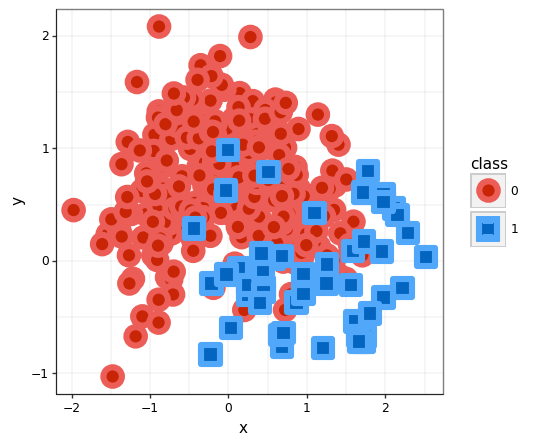

<ggplot: (8766150740938)>

In [3]:
fig = (
    ggplot(data = unequal_noisy_moons,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

In [4]:
# train a classifier
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression()
logit.fit(unequal_noisy_moons[['x1', 'x2']], unequal_noisy_moons[['class']])

LogisticRegression()

In [5]:
# predicting on train
predictions = logit.predict(unequal_noisy_moons[['x1', 'x2']]) 

<font color='red'>  **(Homework exercise 1- a)** Fill in the gaps to complete a function that calculates `tp`, `fn`, `fp`, `tn` depending on which class is considered to be `positive`.  **(1 point)**</font> 

In [6]:
import math

def compute_confusion_stats(classes, positive_class, negative_class):
  #### YOUR CODE STARTS ####
  pred_positive = np.array(unequal_noisy_moons[['class']])[classes == positive_class]
  pred_negative = np.array(unequal_noisy_moons[['class']])[classes == negative_class]

  tp = np.sum(pred_positive == positive_class)
  fn = np.sum(pred_negative == positive_class)
  fp = np.sum(pred_positive == negative_class)
  tn = np.sum(pred_negative == negative_class)
  #### YOUR CODE ENDS ####
  
  return (tp, fn, fp, tn)

def compute_rec_prec_f1(tp, fn, fp, tn):
  recall = tp/(tp + fn)
  precision = tp/(tp + fp)
  f1 = 2*recall*precision/(precision + recall)
  if math.isnan(f1):
    f1 = 0
  return (recall, precision, f1)

<font color='red'>  **(Homework exercise 1- b)** Compute `tp`, `fn`, `fp`, `tn` and `recall`, `precision` and `f1` measures using functions `compute_confusion_stats` and `compute_rec_prec_f1` above. `recall`, `precision` and `f1` should be computed for both classes, e.g. `recall_1` is a recall when the first class is considered to be positive, `recall_0` is a recall when the second class is regarded as positive. **(1 point)**</font> 




In [7]:
# The first class is considered positive
#### YOUR CODE STARTS ####
(tp, fn, fp, tn) = compute_confusion_stats(predictions, 1, 0)
recall_1, precision_1, f1_1 = compute_rec_prec_f1(tp, fn, fp, tn)
#### YOUR CODE ENDS ####

print(f'Recall for the first class = {recall_1}')
print(f'Precision for the first class = {precision_1}')
print(f'F1 score for the first class = {f1_1}')

Recall for the first class = 0.52
Precision for the first class = 0.7428571428571429
F1 score for the first class = 0.6117647058823529


In [8]:
# The second class is considered positive
#### YOUR CODE STARTS ####
(tp, fn, fp, tn) = compute_confusion_stats(predictions, 0, 1)
recall_0, precision_0, f1_0 = compute_rec_prec_f1(tp, fn, fp, tn)
#### YOUR CODE ENDS ####

print(f'Recall for the second class = {recall_0}')
print(f'Precision for the second class = {precision_0}')
print(f'F1 score for the second class = {f1_0}')

Recall for the second class = 0.964
Precision for the second class = 0.909433962264151
F1 score for the second class = 0.9359223300970874


<font color='red'>  **(Homework exercise 1- c)** Without using any external libraries, calculate macro and weighted averages for all metrics. Run the `classification_report` function from `sklearn`, make sure that the outputs match. **(2 points)**</font> 

In [9]:
#### YOUR CODE STARTS ####
unique_classes = len(unequal_noisy_moons['class'].unique())

macro_avg_precision = (precision_1 + precision_0) / unique_classes
print(f'Macro averaging for precision = {np.round(macro_avg_precision,2)}')

macro_avg_recall = (recall_1 + recall_0) / unique_classes
print(f'Macro averaging for recall = {np.round(macro_avg_recall,2)}')

macro_avg_f1 = (f1_1 + f1_0) / unique_classes
print(f'Macro averaging for f1 = {np.round(macro_avg_f1,2)}')
#### YOUR CODE ENDS ####

Macro averaging for precision = 0.83
Macro averaging for recall = 0.74
Macro averaging for f1 = 0.77


In [10]:
#### YOUR CODE STARTS ####
classes_1 = np.sum(unequal_noisy_moons['class'] == 1)
classes_0 = np.sum(unequal_noisy_moons['class'] == 0)
classes_total = len(unequal_noisy_moons['class'])

weighted_avg_precision =  (precision_1 * classes_1 + precision_0 * classes_0) / classes_total
print(f'Weighted averaging for precision = {np.round(weighted_avg_precision,2)}')

weighted_avg_recall = (recall_1 * classes_1 + recall_0 * classes_0) / classes_total
print(f'Weighted averaging for recall = {np.round(weighted_avg_recall,2)}')

weighted_avg_f1 = (f1_1 * classes_1 + f1_0 * classes_0) / classes_total
print(f'Weighted averaging for f1 = {np.round(weighted_avg_f1,2)}')
#### YOUR CODE ENDS ####

Weighted averaging for precision = 0.88
Weighted averaging for recall = 0.89
Weighted averaging for f1 = 0.88


<font color='red'>  Compare all your results with the output of `classification_report` function. Make sure they are the same. </font> 

In [11]:
from sklearn.metrics import classification_report
#### YOUR CODE STARTS ####
print(classification_report(unequal_noisy_moons[['class']], predictions, target_names=['1', '0']))
#### YOUR CODE ENDS ####


              precision    recall  f1-score   support

           1       0.91      0.96      0.94       250
           0       0.74      0.52      0.61        50

    accuracy                           0.89       300
   macro avg       0.83      0.74      0.77       300
weighted avg       0.88      0.89      0.88       300



<font color='red'>  **(Homework exercise 1- d)** Use a different classifier on the same dataset. Calculate only weighted- and macro- average f1 score as we have just done for `LogisticRegression`. Compare the obtained results to figure out which classifier is better. **(1 point)**</font> 

In [12]:
#### YOUR CODE STARTS ####
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(unequal_noisy_moons[['x1', 'x2']], unequal_noisy_moons[['class']])
predictions = clf.predict(unequal_noisy_moons[['x1', 'x2']]) 

(tp, fn, fp, tn) = compute_confusion_stats(predictions, 1, 0)
recall_1, precision_1, f1_1 = compute_rec_prec_f1(tp, fn, fp, tn)

(tp, fn, fp, tn) = compute_confusion_stats(predictions, 0, 1)
recall_0, precision_0, f1_0 = compute_rec_prec_f1(tp, fn, fp, tn)

unique_classes = len(unequal_noisy_moons['class'].unique())
classes_1 = np.sum(unequal_noisy_moons['class'] == 1)
classes_0 = np.sum(unequal_noisy_moons['class'] == 0)
classes_total = len(unequal_noisy_moons['class'])

macro_avg_f1 = (f1_1 + f1_0) / unique_classes
print(f'Macro averaging for f1 = {np.round(macro_avg_f1,2)}')

weighted_avg_f1 = (f1_1 * classes_1 + f1_0 * classes_0) / classes_total
print(f'Weighted averaging for f1 = {np.round(weighted_avg_f1,2)}')
#### YOUR CODE ENDS ####

Macro averaging for f1 = 0.85
Weighted averaging for f1 = 0.92




---

## Homework exercise 2: compare multiple classification methods using precision-recall curve (5 points)


<font color='red'> In the lecture and practice session we have discussed how receiver operating characteristic (ROC) and the corresponding area under this curve (AUC) can be used to assess classifier's performance. Although, being super popular and in majority cases adequate, ROC AUC can be overly optimistic when used on classifiers trained on severely imbalanced data. Another metric, namely - Precision-Recall Curve (PRC) is considered more appropriate for such data. In this exercise, we will learn to build PRC and use it to evaluate already familiar classifiers. Check out [this page](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/) if you want to know more about PRCs. </font> 



In [13]:
# Using the same data as in the previous exercise
from sklearn import datasets

unequal_noisy_moons = datasets.make_moons(n_samples=(250, 50), 
                                          noise=.4, 
                                          random_state=111)

unequal_noisy_moons = pd.DataFrame({'x1':unequal_noisy_moons[0][:,0], 
                            'x2':unequal_noisy_moons[0][:,1], 
                            'class':unequal_noisy_moons[1]})

unequal_noisy_moons['class'] = unequal_noisy_moons['class'].astype('category')

In [14]:
from sklearn.model_selection import train_test_split

# Randomly splitting data into train (60%) and validation (40%)
train, val = train_test_split(unequal_noisy_moons, random_state=0, test_size=0.40) 

<font color='red'>  **(Homework exercise 2- a)** Train three models (decision tree, KNN and random forest) on the synthetic data that we have generated above.  **(0.5 points)**</font> 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1111) # random seed for consistency

#### YOUR CODE STARTS ####
# define all three classifiers using default parameters
DT = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier()

# train classifiers
DT.fit(train[['x1', 'x2']], train[['class']])
KNN.fit(train[['x1', 'x2']], train[['class']])
RF.fit(train[['x1', 'x2']], train[['class']])
#### YOUR CODE ENDS ####

RandomForestClassifier()

<font color='red'>  **(Homework exercise 2- b)** Calculate accuracy for each model on validation set using function `score` and model objects. Separately, compute and print out the accuracy of the majority class classifier (*hint*: you can use `DummyClassifier` from `sklearn` to imitate majority class classifier). **(0.5 points)**</font> 

In [16]:
#### YOUR CODE STARTS ####
print(f"Accuracy of DT is {DT.score(val[['x1', 'x2']], val[['class']]): .3f}%")
print(f"Accuracy of KNN is {KNN.score(val[['x1', 'x2']], val[['class']])}%")
print(f"Accuracy of RF is {RF.score(val[['x1', 'x2']], val[['class']]): .3f}%")

from sklearn.dummy import DummyClassifier
majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(train[['x1', 'x2']], train[['class']])
print(f"Accuracy of majority class classifier is {majority_class_model.score(val[['x1', 'x2']], val[['class']])}%")
#### YOUR CODE ENDS ####

Accuracy of DT is  0.842%
Accuracy of KNN is 0.95%
Accuracy of RF is  0.908%
Accuracy of majority class classifier is 0.85%


<font color='red'>  **(Homework exercise 2- c)** Get probability scores for the positive class on the validation data from all four models (including the majority class classifier). **(0.5 points)**</font> 

In [17]:
#### YOUR CODE STARTS ####
val['DT'] = DT.predict_proba(val[['x1', 'x2']])[:, 1]
val['KNN'] = KNN.predict_proba(val[['x1', 'x2']])[:, 1]
val['RF'] = RF.predict_proba(val[['x1', 'x2']])[:, 1]
val['MAJORITY'] = majority_class_model.predict_proba(val[['x1', 'x2']])[:, 1] # majority class
#### YOUR CODE ENDS ####

<font color='red'>  **(Homework exercise 2- d)** Transform the function `generate_coordinates` from the practice session into a new function `generate_PR_coordinates` such that the later instead of FPRs and TPRs computes Precision and Recall for each possible threshold. Create PRC coordinates for each model using `generate_PR_coordinates`. Next, use function `plot_pr` which was provided to you to visualise PRCs for all four models. **(1.5 points)**</font> 

In [18]:
def generate_PR_coordinates(scores, classes):
  
  # thresholds can be obtained from scores
  thresholds = scores.unique()

  # initialise 
  precisions = []
  recalls = []

  for threshold in thresholds:
    
    predictions = scores >= threshold
    pred_positive = classes[predictions == 1].to_numpy().flatten()
    pred_negative = classes[predictions == 0].to_numpy().flatten()
    
    tp = np.sum(pred_positive == 1)
    fn = np.sum(pred_negative == 1)
    tn = np.sum(pred_negative == 0)
    fp = np.sum(pred_positive == 0)
    
    ##### YOUR CODE STARTS #####
    
    recall = tp/(tp + fn)
    precision = tp/(tp + fp)
    
    ##### YOUR CODE ENDS #####

    recalls.append(recall)
    precisions.append(precision)
  
  pr_coordinates = pd.DataFrame({'PRECISION': np.round(precisions, 3),
                                 'RECALL': np.round(recalls, 3)},
                                index=thresholds)

  return pr_coordinates

In [19]:
#### YOUR CODE STARTS ####
val = val.sort_values('DT',  ascending=False) # do not change sort lines
dt_pr_coordinates = generate_PR_coordinates(val['DT'], val['class'])

val = val.sort_values('KNN',  ascending=False)
knn_pr_coordinates = generate_PR_coordinates(val['KNN'], val['class'])

val = val.sort_values('RF',  ascending=False)
rf_pr_coordinates = generate_PR_coordinates(val['RF'], val['class'])

val = val.sort_values('MAJORITY',  ascending=False)
majority_pr_coordinates = generate_PR_coordinates(val['MAJORITY'], val['class'])
#### YOUR CODE ENDS ####

In [20]:
# Note that our PRCs will start from 1,0 not 0,0 in case of ROCs
top_row =  pd.DataFrame({'PRECISION':1, 'RECALL':0}, index=[1.0])

#### YOUR CODE STARTS ####
final_dt_pr_coordinates = pd.concat([top_row, dt_pr_coordinates])
final_knn_pr_coordinates = pd.concat([top_row, knn_pr_coordinates])
final_rf_pr_coordinates = pd.concat([top_row, rf_pr_coordinates])
final_majority_pr_coordinates = pd.concat([top_row, majority_pr_coordinates])
#### YOUR CODE ENDS ####

In [21]:
def plot_pr(coordinates_dict):
  """
  plot_pr function plots all models' PRCs on one plot
  """
  plotting_data = pd.DataFrame(columns=['PRECISION', 'RECALL', 'Method'])

  for id, name in enumerate(coordinates_dict.keys()):
    method_data = coordinates_dict[name]
    method_data['Method'] = name
    plotting_data = pd.concat([plotting_data, method_data])
  
  plotting_data['Method'] = pd.Categorical(plotting_data['Method'])
  
  # To those of you who are interested in what the hell is going on
  # check the comments for each line:
  roc_plot = (
        ggplot(data = plotting_data, # creates a canvas
        mapping = aes(x = 'RECALL', y = 'PRECISION', colour = 'Method')) + # specifies dimensions
        geom_path(size = 1.5) + # determines geometric primitive to be visualised (path/line in our case) and its thickness 
        labs(title ='', x = 'RECALL', y = 'PRECISION') + # labels of the x and y axes
        # this is all for the figure, beloow are only formatting specs
        theme_bw() + # colour schema 
        theme(figure_size = (5, 5), # figure size
              axis_line = element_line(size = 0.5, colour = "black"), 
              panel_grid_major = element_line(size = 0.05, colour = "black"),
              panel_grid_minor = element_line(size = 0.05, colour = "black"),
              axis_text = element_text(colour ='black')) # more formatting details 
      )
  return roc_plot


<font color='red'>  Visualise the resulting PR curves below. </font> 

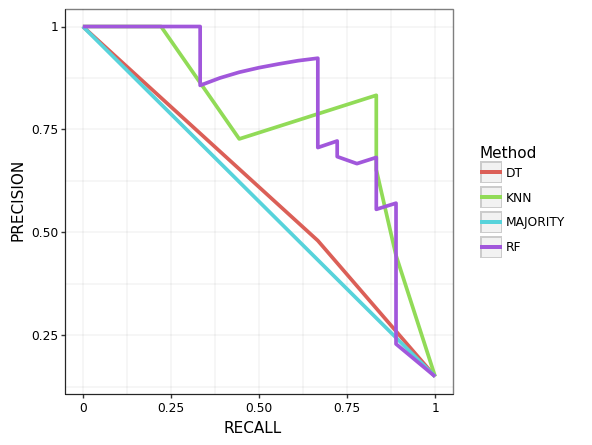

<ggplot: (8766148750553)>

In [22]:
#### YOUR CODE STARTS ####
plot_pr({'DT': final_dt_pr_coordinates,'KNN': final_knn_pr_coordinates,'RF': final_rf_pr_coordinates, 'MAJORITY': final_majority_pr_coordinates})
#### YOUR CODE ENDS ####

<font color='red'>  **(Homework exercise 2- e)** Use sklearn functions `PrecisionRecallDisplay` and `precision_recall_curve` and matplotlib to verify that your curves from 2-d are correct. **(0.5 points)**</font> 

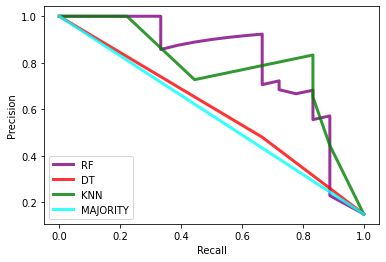

In [23]:
#Importing the required libraries
from sklearn.metrics._plot.precision_recall_curve import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
ax = plt.gca()

#### YOUR CODE STARTS ####

precision_, recall_, _ = precision_recall_curve(val['class'], val['DT'])
dt_disp = PrecisionRecallDisplay(precision=precision_, recall=recall_)

precision_, recall_, _ = precision_recall_curve(val['class'], val['KNN'])
knn_disp = PrecisionRecallDisplay(precision=precision_, recall=recall_)

precision_, recall_, _ = precision_recall_curve(val['class'], val['RF'])
rf_disp = PrecisionRecallDisplay(precision=precision_, recall=recall_)

precision_, recall_, _ = precision_recall_curve(val['class'], val['MAJORITY'])
majority_disp = PrecisionRecallDisplay(precision=precision_, recall=recall_)

#### YOUR CODE ENDS ####

rf_disp.plot(ax=ax, alpha=0.8, drawstyle = 'default', label = 'RF', color='purple', linewidth=3)
dt_disp.plot(ax=ax, alpha=0.8, drawstyle = 'default', label = 'DT', color='red', linewidth=3)
knn_disp.plot(ax=ax, alpha=0.8, drawstyle = 'default', label = 'KNN', color='green', linewidth=3)
majority_disp.plot(ax=ax, alpha=0.8, drawstyle = 'default', label = 'MAJORITY', color='cyan', linewidth=3)

<font color='red'>  **(Homework exercise 2- f)** Create two ensembles: VotingClassifier (with soft voting) and StackingClassifier using previously used models. Visualise performances of the ensembles using PRCs. Add PRCs from the previous models on the same plot for the comparison. **(1.5 points)**</font> 

In [24]:
np.random.seed(1111) # random seed for consistency

# Voting classifier comes here:
from sklearn.ensemble import VotingClassifier

#### YOUR CODE STARTS ####
estimators = [('DT', DT), ('KNN', KNN), ('RF', RF)]
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')
ensemble_model.fit(train[['x1', 'x2']], train['class']) 

val['VOTING'] = ensemble_model.predict_proba(val[['x1', 'x2']])[:, 1]
val = val.sort_values('VOTING',  ascending=False)
voting_pr_coordinates = generate_PR_coordinates(val['VOTING'], val['class'])

final_voting_pr_coordinates = pd.concat([top_row, voting_pr_coordinates])
#### YOUR CODE ENDS ####

# Stacking comes here:
from sklearn.ensemble import StackingClassifier
#### YOUR CODE STARTS ####
estimators = [('DT', DT), ('KNN', KNN), ('RF', RF)]
stacking_classifier = StackingClassifier(estimators=estimators)
stacking_classifier.fit(train[['x1', 'x2']], train['class']) 

val['STACKING'] = stacking_classifier.predict_proba(val[['x1', 'x2']])[:, 1]
val = val.sort_values('STACKING',  ascending=False)
stacking_pr_coordinates = generate_PR_coordinates(val['STACKING'], val['class'])

final_stacking_pr_coordinates = pd.concat([top_row, stacking_pr_coordinates])
#### YOUR CODE ENDS ####

<font color='red'>  Visualise the resulting PR curves below. </font> 

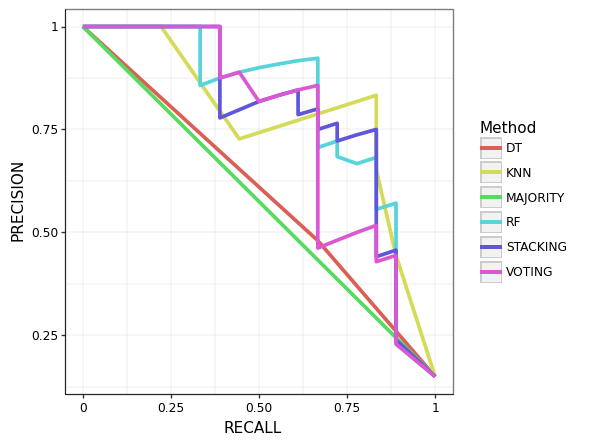

<ggplot: (8766148652249)>

In [25]:
#### YOUR CODE STARTS ####
plot_pr({'DT': final_dt_pr_coordinates,'KNN': final_knn_pr_coordinates,
         'RF': final_rf_pr_coordinates, 'MAJORITY': final_majority_pr_coordinates, 
         'VOTING': final_voting_pr_coordinates, 'STACKING':final_stacking_pr_coordinates})
#### YOUR CODE ENDS ####

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you send on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us